In [ ]:
# 
# Data Import & Prep
#

In [1]:
import pymongo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
#Lavendar color for powerpoint #D7B9C4, blue color #AFD7E6

In [2]:
#Grab datafrom MongoDB and assign data to Pandas Dataframe
client = pymongo.MongoClient('localhost',27017)
db = client.poshmark_db
db.list_collection_names()

['sold_clutches']

In [3]:
#Find all documents in sold_clutches collection and assign documents to a list
coll = db.sold_clutches
docs = coll.find()
doclist = [listing for listing in docs]
len(doclist)

50847

In [4]:
#Create pandas datafram from doclist & get column names for future reference
df = pd.DataFrame(doclist)
df.columns

Index(['_id', 'brand', 'colors', 'comment_count', 'condition',
       'creator_handle', 'description', 'id', 'inventory_status_changed_dt',
       'like_count', 'og_price', 'sell_price', 'seller_offer', 'share_count',
       'title'],
      dtype='object')

In [5]:
#Apply data filters
#Create DF with examples that contain a condition that is not blank or == 'ret' 
# and original price between 25 and 5000 & sell price > 10 to remove outliers 
#cond_df = pd.DataFrame()
cond_df = df[df.condition != '']
cond_df = cond_df[cond_df.condition != 'ret']
cond_df = cond_df[cond_df.og_price >= 10]
cond_df = cond_df[cond_df.og_price <= 7000]
cond_df = cond_df[cond_df.sell_price >= 10]
cond_df['brand'] = cond_df['brand'].str.strip()
cond_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19311 entries, 1 to 50844
Data columns (total 15 columns):
_id                            19311 non-null object
brand                          19311 non-null object
colors                         19311 non-null object
comment_count                  19311 non-null int64
condition                      19311 non-null object
creator_handle                 19311 non-null object
description                    19311 non-null object
id                             19311 non-null object
inventory_status_changed_dt    12620 non-null object
like_count                     19311 non-null int64
og_price                       19311 non-null float64
sell_price                     19311 non-null float64
seller_offer                   12620 non-null object
share_count                    19311 non-null int64
title                          19311 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 2.4+ MB


In [6]:
#List of brands
cond_df['brand'].unique()

array(['betsey johnson', 'fossil', 'guess', 'gucci', 'chanel', 'coach',
       'kate spade', 'rebecca minkoff', 'mossimo supply co.',
       'sole society', 'louis vuitton', 'steve madden'], dtype=object)

In [7]:
#
# Data Exploration
#

Text(0,0.5,'Selling Price')

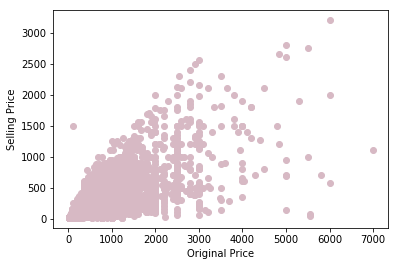

In [9]:
#Check correlation with scatterplot
plt.scatter(y=cond_df['sell_price'], x=cond_df['og_price'], color='#D7B9C4')
plt.xlabel('Original Price')
plt.ylabel('Selling Price')

In [10]:
cond_df['sell_percent'] = cond_df['sell_price'] / cond_df['og_price']
low_sell_df = cond_df[['_id', 'brand', 'og_price', 'sell_price', 'condition', 'sell_percent']].copy()
low_sell_df = low_sell_df[low_sell_df.sell_percent < .20]
low_sell_df

,_id,brand,og_price,sell_price,condition,sell_percent
1,606b3a366b53b4fd918bf62e,betsey johnson,1234.0,20.0,nwt,0.016207
8,606b3a366b53b4fd918bf635,betsey johnson,159.0,26.0,nwt,0.163522
27,606b3a366b53b4fd918bf648,betsey johnson,999.0,25.0,not_nwt,0.025025
85,606b3a366b53b4fd918bf682,betsey johnson,1234.0,13.0,nwt,0.010535
164,606b3a366b53b4fd918bf6d1,betsey johnson,999.0,10.0,not_nwt,0.010010
212,606b3a366b53b4fd918bf701,betsey johnson,89.0,15.0,nwt,0.168539
255,606b3a366b53b4fd918bf72c,betsey johnson,69.0,10.0,not_nwt,0.144928
269,606b3a366b53b4fd918bf73a,betsey johnson,55.0,10.0,not_nwt,0.181818
405,606b3a366b53b4fd918bf7c2,betsey johnson,128.0,25.0,nwt,0.195312
433,606b3a366b53b4fd918bf7de,betsey johnson,58.0,11.0,nwt,0.189655


In [11]:
low_sell_df['sell_percent'].describe()

count    2982.000000
mean        0.136271
std         0.044401
min         0.006301
25%         0.109649
50%         0.147059
75%         0.170455
max         0.199199
Name: sell_percent, dtype: float64

In [12]:
cond_df['sell_percent'].describe()

count    19311.000000
mean         0.380467
std          0.222262
min          0.006301
25%          0.238095
50%          0.346939
75%          0.500000
max         15.000000
Name: sell_percent, dtype: float64

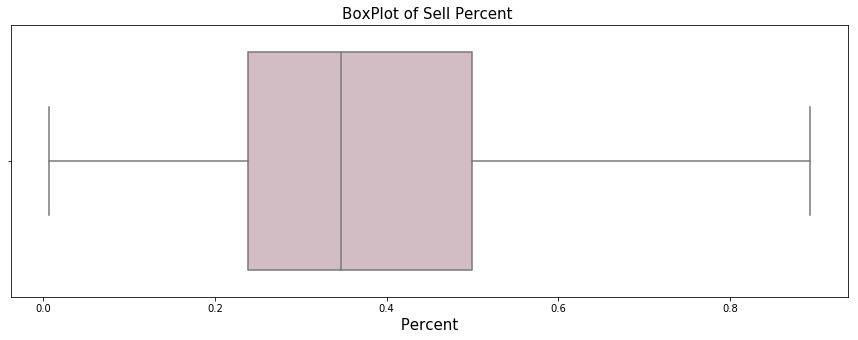

In [13]:
#Boxplot for selling percent
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x='sell_percent', data=cond_df, showfliers=False, color='#D7B9C4')
plt.title("BoxPlot of Sell Percent ", fontsize=15)
plt.xlabel(' Percent ', fontsize=15)
plt.show()
#Most items sell for about 25% to about 55%, which is very common pricing for second-hand items
#Will filter the extremely low-priced items from the model, buyers can always give a discount or lower price if acitivity is low.

In [14]:
#Filter sell_percent items that are less thant 10%
cond_df = cond_df[cond_df.sell_percent >= 0.2]
len(cond_df)

16329

Text(0,0.5,'Selling Price')

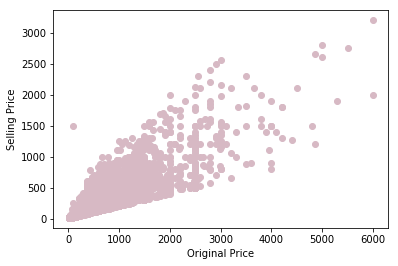

In [15]:
#Check correlation with scatterplot again
plt.scatter(y=cond_df['sell_price'], x=cond_df['og_price'], color='#D7B9C4')
plt.xlabel('Original Price')
plt.ylabel('Selling Price')

In [16]:
#Grab descriptive stats for orginal and selling price
print(cond_df['og_price'].describe())
print('\n')
print(cond_df['sell_price'].describe())

count    16329.000000
mean       251.052055
std        447.369279
min         10.000000
25%         52.000000
50%         80.000000
75%        165.000000
max       6000.000000
Name: og_price, dtype: float64


count    16329.000000
mean       112.090514
std        218.716817
min         10.000000
25%         20.000000
50%         31.000000
75%         68.000000
max       3200.000000
Name: sell_price, dtype: float64


In [17]:
cond_df.describe()

,comment_count,like_count,og_price,sell_price,share_count,sell_percent
count,16329.000000,16329.000000,16329.000000,16329.000000,16329.000000,16329.000000
mean,3.219303,10.988242,251.052055,112.090514,41.978382,0.425063
std,6.726856,16.380590,447.369279,218.716817,174.970347,0.212563
min,0.000000,0.000000,10.000000,10.000000,0.000000,0.200000
25%,0.000000,3.000000,52.000000,20.000000,0.000000,0.289308
50%,1.000000,6.000000,80.000000,31.000000,4.000000,0.386364
75%,4.000000,13.000000,165.000000,68.000000,18.000000,0.520000
max,277.000000,342.000000,6000.000000,3200.000000,5206.000000,15.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002020FAF5C18>]],
      dtype=object)

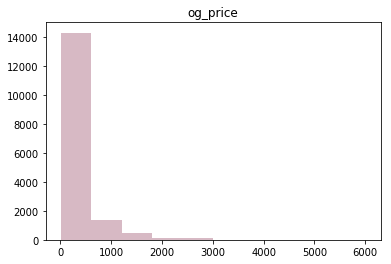

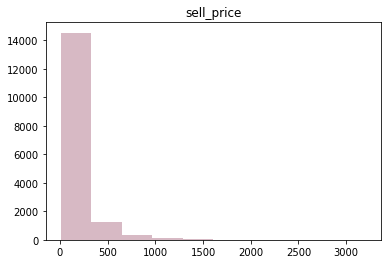

In [20]:
#Hist plosts for original and sell price
cond_df.hist(column='og_price', color='#D7B9C4', grid=False)
cond_df.hist(column='sell_price', color='#D7B9C4', grid=False)
#Right-skewed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020210579390>,
      dtype=object)

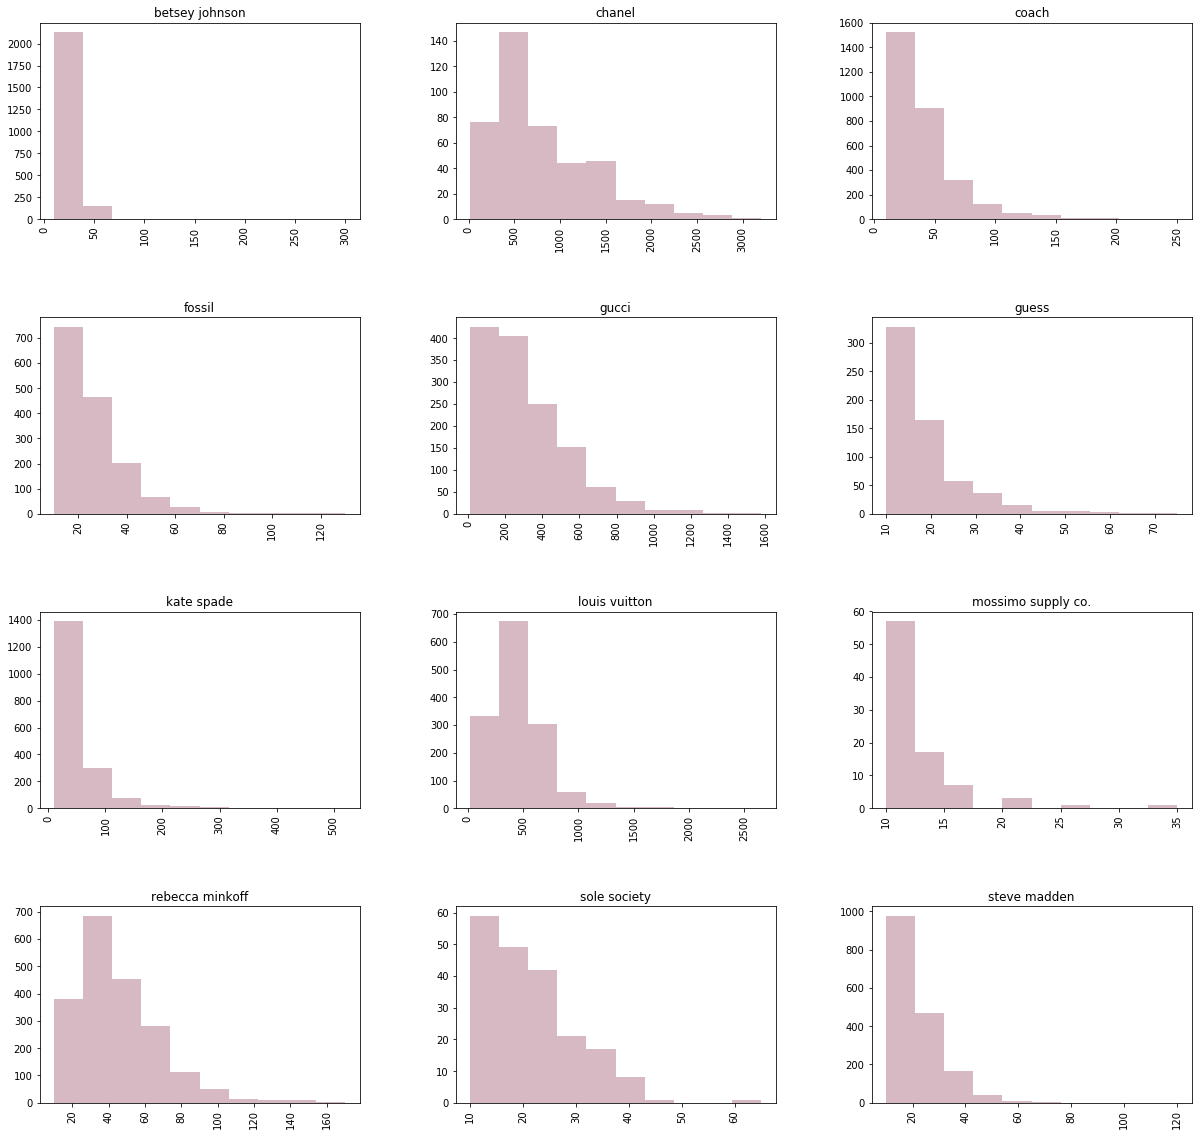

In [21]:
# Create separate hist plots for each brand to show the sell price distribution
cond_df.hist(column='sell_price', by = 'brand', color='#D7B9C4', figsize=(20,20))

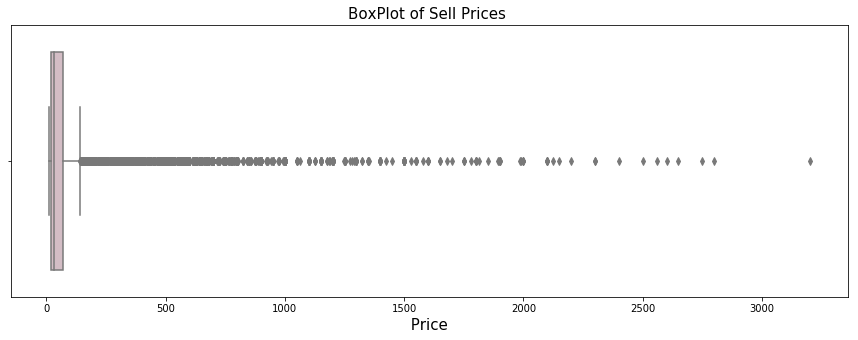

In [22]:
#Boxplot for selling price by brand
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x='sell_price', data=cond_df, showfliers=True, color='#D7B9C4')
plt.title("BoxPlot of Sell Prices ", fontsize=15)
plt.xlabel(' Price ', fontsize=15)
plt.show()
#There are many outliers

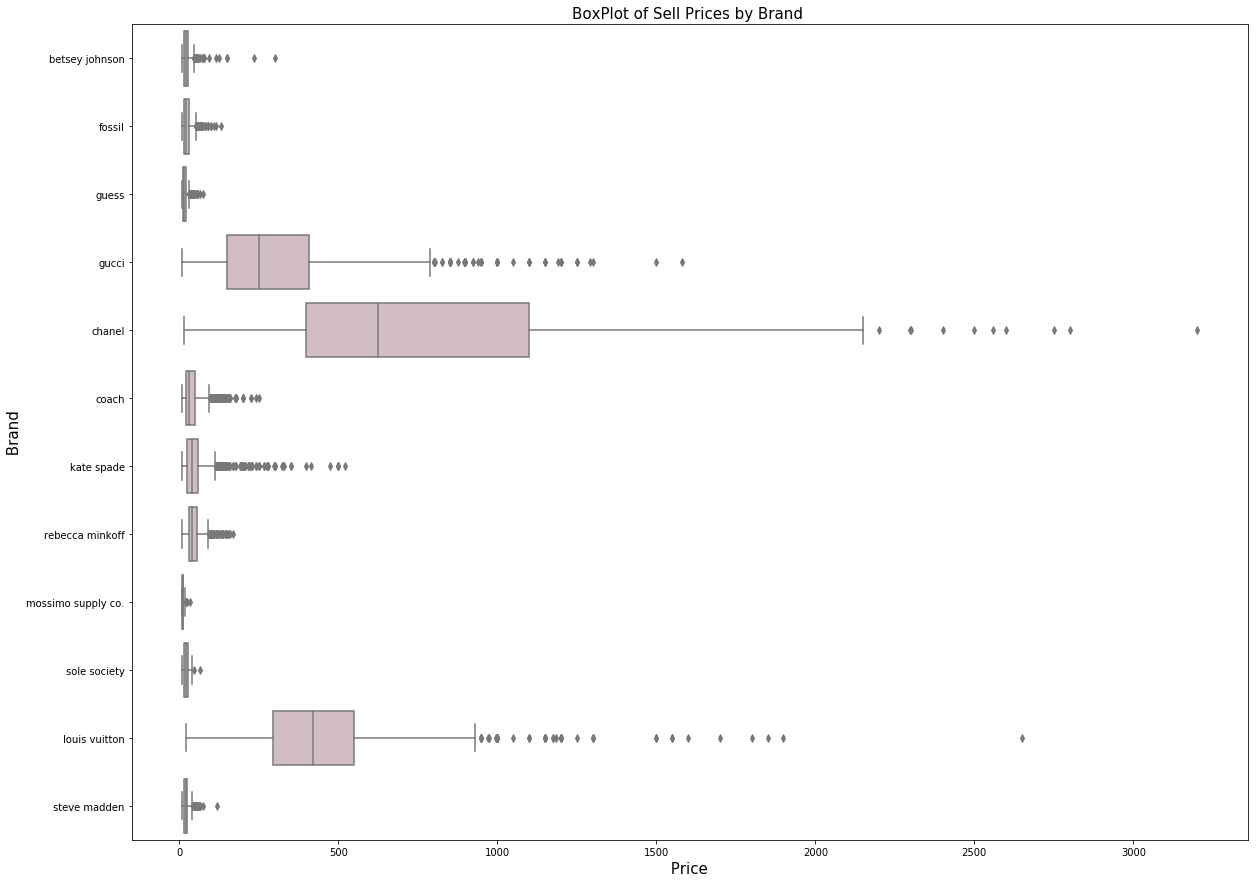

In [23]:
#Boxplot for selling price by brand
fig, ax = plt.subplots(figsize=(20, 15))
sns.boxplot(x='sell_price', y='brand', data=cond_df, showfliers=True, color='#D7B9C4')
plt.title("BoxPlot of Sell Prices by Brand ", fontsize=15)
plt.xlabel(' Price ', fontsize=15)
plt.ylabel(' Brand ', fontsize=15)
plt.show()
#There are many outliers, will check again and omit them.

In [24]:
#Create brand tiers based on their mean selling price. 
brand_sell_df = cond_df[['brand', 'sell_price']].copy()
brand_means = brand_sell_df.groupby(['brand']).mean()
brand_means.sort_values(by=['sell_price'], inplace=True, ascending=True)
brand_means
#This will give meaning to the values after being encoded.

,sell_price
brand,
mossimo supply co.,12.255814
guess,18.477273
steve madden,21.596745
sole society,21.883838
betsey johnson,22.409449
fossil,25.191167
coach,40.281061
rebecca minkoff,45.046069
kate spade,53.304918


In [30]:
#Sort dataframe brands to prepare for categorical numbering
sorter = ['mossimo supply co.', 'guess', 'steve madden', 'sole society', 'betsey johnson', 'fossil', 'coach', 'rebecca minkoff',
         'kate spade', 'gucci', 'louis vuitton', 'chanel']

cond_df.brand = cond_df.brand.astype('category')
cond_df.brand = cond_df.brand.cat.set_categories(sorter, ordered=True)

cond_df.sort_values(['brand'])
cond_df.head(5)

,_id,brand,colors,comment_count,condition,creator_handle,description,id,inventory_status_changed_dt,like_count,og_price,sell_price,seller_offer,share_count,title,sell_percent
5,606b3a366b53b4fd918bf632,betsey johnson,"[{'name': 'Green', 'rgb': '#3c9c44'}, {'name':...",0,nwt,mastapleton,betsey johnson cheers wristlet\nnew with tags ...,5fb573862f3d19891bc74ff6,2021-04-04T17:33:37-07:00,32,68.0,30.0,False,20,betsey johnson cheers wristlet,0.441176
6,606b3a366b53b4fd918bf633,betsey johnson,"[{'name': 'Blue', 'rgb': '#137fc1'}]",2,not_nwt,soosan_18,betsey johnson blue crab wristlet. this cute w...,5f45af417f80d2982762e6e7,2021-04-02T13:29:28-07:00,18,48.0,35.0,False,6,betsey johnson blue crab wristlet,0.729167
11,606b3a366b53b4fd918bf638,betsey johnson,"[{'name': 'Brown', 'rgb': '#663509'}, {'name':...",0,nwt,lillyluvr222,2 piece betsy johnson “ phone a friend “ wrist...,606289fb180136e531dc3216,2021-04-04T12:01:05-07:00,7,58.0,40.0,False,5,betsy johnson phone a friend wristlet,0.689655
12,606b3a366b53b4fd918bf639,betsey johnson,"[{'name': 'Purple', 'rgb': '#7f0f81'}, {'name'...",2,nwt,ckcloset1,this is a brand new betsey johnson lavender st...,5ec6f603284e991d1c768b8b,2021-04-04T05:12:16-07:00,33,48.0,25.0,True,559,betsey johnson star caticorn coin purse/wristlet,0.520833
14,606b3a366b53b4fd918bf63b,betsey johnson,"[{'name': 'Pink', 'rgb': '#fb1680 '}, {'name':...",1,nwt,debsrandomstuff,betsey johnson watermelon slice coin purse wri...,5c1c22d2357a58cd42cf4f06,2021-04-03T14:09:03-07:00,20,38.0,15.0,True,265,betsey johnson watermelon slice coin purse,0.394737


In [41]:
sorter = ['mossimo supply co.', 'guess', 'steve madden', 'sole society', 'betsey johnson', 'fossil', 'coach', 'rebecca minkoff',
         'kate spade', 'gucci', 'louis vuitton', 'chanel']

df_mapping = pd.DataFrame(sorter)
df_mapping.rename(columns = {0:'brand'}, inplace=True)
df_mapping
sort_mapping = df_mapping.reset_index().set_index('brand')

In [43]:
#Add sorting value to df
cond_df['brand_sort_val'] = cond_df.brand.map(sort_mapping['index'])

In [44]:
cond_df.sort_values('brand_sort_val')

,_id,brand,colors,comment_count,condition,creator_handle,description,id,inventory_status_changed_dt,like_count,og_price,sell_price,seller_offer,share_count,title,sell_percent,brand_sort_val
35192,606b3a366b53b4fd918c7fa5,mossimo supply co.,"[{'name': 'Gold', 'rgb': '#ffd72e'}, {'name': ...",8,nwt,673426966,"great for 🍀st.patrick day!🍀\n4.5""h × 6.38""w×0....",5a7d402b72ea888d25d8bae0,2018-03-04T18:20:09-08:00,1,20.0,10.0,False,0,envelope-flap crossbody clutch handbag,0.500000,0
35263,606b3a366b53b4fd918c7fec,mossimo supply co.,"[{'name': 'Black', 'rgb': '#000000'}, {'name':...",4,not_nwt,eclectickelly,beautiful beaded boho mossimo clutch white bea...,5a19af053c6f9fe1d7018d37,2019-05-30T08:55:51-07:00,6,24.0,10.0,False,0,mossimo boho tassel beaded clutch,0.416667,0
35264,606b3a366b53b4fd918c7fed,mossimo supply co.,"[{'name': 'Gray', 'rgb': '#929292'}]",7,nwt,misspostgradceo,this grey clutch is studded on the front and p...,5bc8b8ae3e0caa1fe4967f5a,2019-05-17T15:00:30-07:00,3,25.0,13.0,True,0,grey studded clutch,0.520000,0
35273,606b3a366b53b4fd918c7ff6,mossimo supply co.,"[{'name': 'Silver', 'rgb': '#e9ebec'}, {'name'...",5,not_nwt,natalie12591,silver metallic mossimo crossbody clutch with ...,5c7db113baebf62fcabfe14d,2019-04-10T12:48:44-07:00,5,34.0,10.0,False,0,silver & gold crossbody clutch,0.294118,0
35279,606b3a366b53b4fd918c7ffc,mossimo supply co.,"[{'name': 'Yellow', 'rgb': '#ffee37'}, {'name'...",0,not_nwt,amazonianrivkah,mossimo supply co. mustard yellow mix tape wal...,5c9a82b7035cf161ac6c4470,2019-03-27T13:04:31-07:00,1,25.0,14.0,False,0,mix tape clutch,0.560000,0
35281,606b3a366b53b4fd918c7ffe,mossimo supply co.,"[{'name': 'Gray', 'rgb': '#929292'}, {'name': ...",0,nwt,mirravoxmarket,brand: mossimo\ncolor: gray\nsturdy quilted fa...,5c7fb9d5882567008baba03f,2019-03-22T15:31:28-07:00,3,30.0,13.0,True,0,mossimo gray quilted faux leather wristlet wallet,0.433333,0
35296,606b3a366b53b4fd918c800d,mossimo supply co.,[],0,nwt,17kayp,mossimo,5c72f43afe5151763a3ad7f5,2019-02-27T11:38:50-08:00,0,13.0,10.0,False,0,robin egg blue wristlet,0.769231,0
35302,606b3a366b53b4fd918c8013,mossimo supply co.,"[{'name': 'Green', 'rgb': '#3c9c44'}, {'name':...",0,nwt,tay603,multiple compartment \nclutch/wallet \ncamo an...,5bff6282534ef99d793a0bd3,2019-02-05T09:38:28-08:00,4,13.0,10.0,True,0,cute camo wallet,0.769231,0
35303,606b3a366b53b4fd918c8014,mossimo supply co.,"[{'name': 'Pink', 'rgb': '#fb1680 '}]",0,nwt,alyssav24,"nwt pink zipper wallet, perfect to hold 6+ cre...",5c44e87ac2e9feae6781af5e,2019-06-28T05:14:46-07:00,2,28.0,10.0,False,0,mossimo zip wallet,0.357143,0
35262,606b3a366b53b4fd918c7feb,mossimo supply co.,"[{'name': 'Black', 'rgb': '#000000'}, {'name':...",0,not_nwt,lolopopp,this faux leather studded wristlet or clutch p...,5bc0fd323c98447a3db6bfa2,2019-05-23T02:21:24-07:00,16,24.0,10.0,True,0,black studded wristlet or clutch,0.416667,0


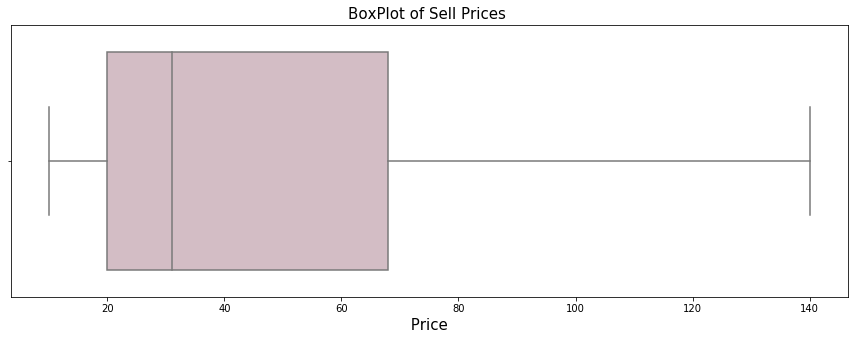

In [45]:
#Boxplot for selling price 
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x='sell_price', data=cond_df, showfliers=False, color='#D7B9C4')
plt.title("BoxPlot of Sell Prices ", fontsize=15)
plt.xlabel(' Price ', fontsize=15)
plt.show()
# 75% of the data has a sell price between $0-65

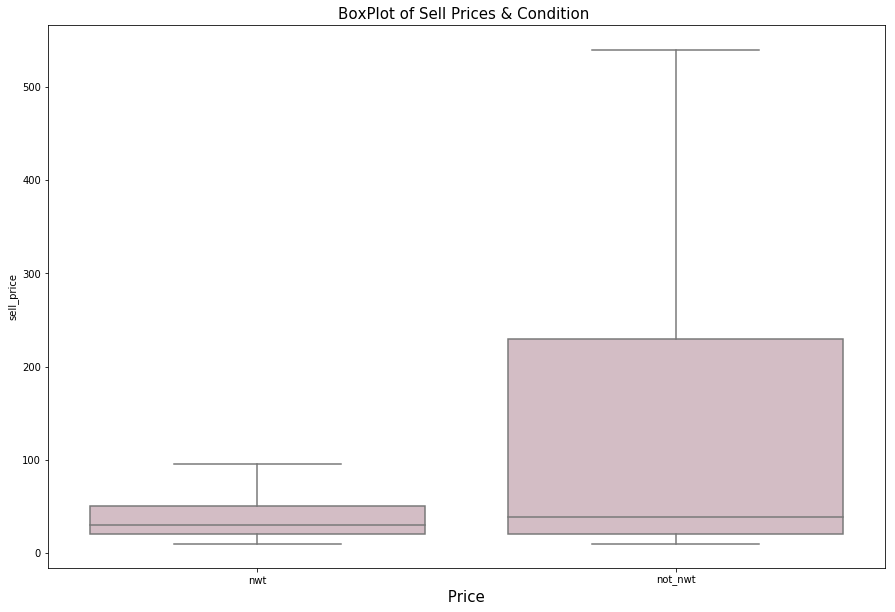

In [46]:
#Boxplot for sell price and condition
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(y='sell_price', x='condition', data=cond_df, showfliers=False, color='#D7B9C4')
plt.title("BoxPlot of Sell Prices & Condition ", fontsize=15)
plt.xlabel(' Price ', fontsize=15)
plt.show()
#There is a relationship between condition and sell price

In [47]:
not_nwt_df = cond_df[cond_df.condition == 'not_nwt']
len(not_nwt_df)

6025

In [48]:
not_nwt_df.describe()

,comment_count,like_count,og_price,sell_price,share_count,sell_percent,brand_sort_val
count,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000
mean,4.047635,11.964481,394.308050,162.041826,26.513693,0.380515,6.986888
std,7.105136,17.963601,561.879314,256.211738,124.316214,0.252803,2.683194
min,0.000000,0.000000,10.000000,10.000000,0.000000,0.200000,0.000000
25%,0.000000,3.000000,65.000000,20.000000,0.000000,0.255102,6.000000
50%,2.000000,6.000000,100.000000,39.000000,3.000000,0.333333,7.000000
75%,5.000000,14.000000,595.000000,230.000000,13.000000,0.453333,9.000000
max,84.000000,277.000000,6000.000000,3200.000000,5206.000000,15.000000,11.000000


In [49]:
not_nwt_df = not_nwt_df[not_nwt_df.sell_price >= 180]

In [50]:
not_nwt_df.brand.unique()

[gucci, chanel, coach, kate spade, louis vuitton]
Categories (5, object): [coach < kate spade < gucci < louis vuitton < chanel]

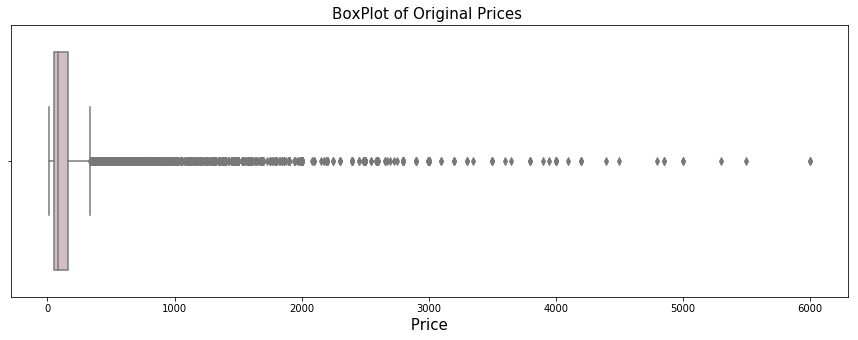

In [51]:
#Boxplot for original price by brand
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x='og_price', data=cond_df, showfliers=True, color='#D7B9C4')
plt.title("BoxPlot of Original Prices ", fontsize=15)
plt.xlabel(' Price ', fontsize=15)
plt.show()
#There are many outliers

In [ ]:
#
# Data Transformation
#

In [55]:
#Create dataframe for regression analysis: id, brand, og_price, sell_price, and condition
reg_df = cond_df[['_id', 'brand_sort_val', 'og_price', 'sell_price', 'condition']].copy()

In [56]:
reg_df.head(5)

,_id,brand_sort_val,og_price,sell_price,condition
5,606b3a366b53b4fd918bf632,4,68.0,30.0,nwt
6,606b3a366b53b4fd918bf633,4,48.0,35.0,not_nwt
11,606b3a366b53b4fd918bf638,4,58.0,40.0,nwt
12,606b3a366b53b4fd918bf639,4,48.0,25.0,nwt
14,606b3a366b53b4fd918bf63b,4,38.0,15.0,nwt


In [57]:
#Boxcox transformation for original and sell price because they skew to the right
from scipy.special import boxcox, inv_boxcox

#Lambda value
ld = -0.002

reg_df['og_price']  = boxcox(reg_df['og_price'],ld)
reg_df['sell_price'] = boxcox(reg_df['sell_price'],ld)
reg_df.tail(5)

,_id,brand_sort_val,og_price,sell_price,condition
50839,606b3a366b53b4fd918cbcc4,2,3.769906,3.208537,nwt
50840,606b3a366b53b4fd918cbcc5,2,4.044000,3.624386,nwt
50841,606b3a366b53b4fd918cbcc6,2,4.044000,3.208537,nwt
50843,606b3a366b53b4fd918cbcc8,2,4.044000,3.208537,nwt
50844,606b3a366b53b4fd918cbcc9,2,4.044000,3.389655,nwt


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002020F7D6710>]],
      dtype=object)

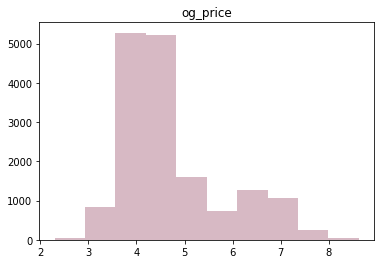

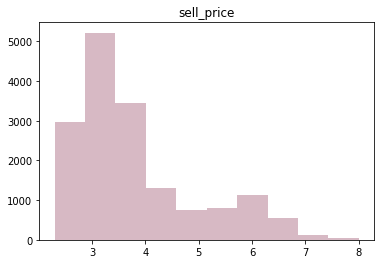

In [58]:
#Verify shape after transformation
#Hist plosts for original and sell price
reg_df.hist(column='og_price', color='#D7B9C4', grid=False)
reg_df.hist(column='sell_price', color='#D7B9C4', grid=False)
#Right-skewed

In [60]:
#Encode categorical features (brand and condition) for regression
labelencoder = LabelEncoder()

#Encode condition
reg_df['condition'] = labelencoder.fit_transform(reg_df['condition'])
reg_df.head(5)

,_id,brand_sort_val,og_price,sell_price,condition
5,606b3a366b53b4fd918bf632,4,4.201753,3.389655,1
6,606b3a366b53b4fd918bf633,4,3.856253,3.542737,0
11,606b3a366b53b4fd918bf638,4,4.044000,3.675305,1
12,606b3a366b53b4fd918bf639,4,3.856253,3.208537,1
14,606b3a366b53b4fd918bf63b,4,3.624386,2.700730,1


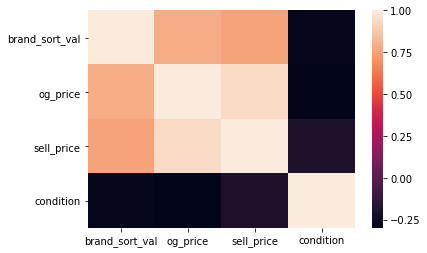

In [61]:
#Correlation matrix
corr = reg_df.corr()
sns.heatmap(corr)

In [89]:
corr
#High correlation between brand_sort_val and original price. Omitting brand from model

,brand_sort_val,og_price,sell_price,condition
brand_sort_val,1.000000,0.791717,0.756864,-0.280095
og_price,0.791717,1.000000,0.942222,-0.299345
sell_price,0.756864,0.942222,1.000000,-0.202231
condition,-0.280095,-0.299345,-0.202231,1.000000


In [98]:
#Separate features and target into y and x variables
#shuffle dataset
reg_df = reg_df.sample(frac = 1)
y = reg_df['sell_price']
x = reg_df[['og_price', 'condition']]
X = sm.add_constant(x)
X_train = X
y_train = y

#Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 465)

In [91]:
#Fit with train
gls_mod = sm.GLS(y_train,X_train).fit()
gls_mod.summary()
#Kurtosis and Skew values look much better after the Box-Cox transformation. Testing results before transformation were ~65%.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:             sell_price   R-squared:                       0.898
Model:                            GLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                 5.003e+04
Date:                Tue, 25 May 2021   Prob (F-statistic):               0.00
Time:                        15:08:08   Log-Likelihood:                -4921.4
No. Observations:               11430   AIC:                             9849.
Df Residuals:                   11427   BIC:                             9871.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2862      0.018    -70.095      0.000      -1.322      -1.250
og_price       1.0479      0.003    309.108      0.000       1.041       1.055
condition      0.2102      0.008     27.798      0.000       0.195       0.225
==============================================================================
Omnibus:                      214.164   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.626
Skew:                           0.217   Prob(JB):                     2.42e-37
Kurtosis:                       2.593   Cond. No.                         27.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
#Fit with test
gls_mod_test = sm.GLS(y_test,X_test).fit()
gls_mod_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:             sell_price   R-squared:                       0.888
Model:                            GLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 1.950e+04
Date:                Tue, 25 May 2021   Prob (F-statistic):               0.00
Time:                        15:08:10   Log-Likelihood:                -2321.6
No. Observations:                4899   AIC:                             4649.
Df Residuals:                    4896   BIC:                             4669.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2888      0.029    -43.882      0.000      -1.346      -1.231
og_price       1.0470      0.005    192.746      0.000       1.036       1.058
condition      0.2139      0.012     17.715      0.000       0.190       0.238
==============================================================================
Omnibus:                      313.307   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              599.255
Skew:                           0.458   Prob(JB):                    7.47e-131
Kurtosis:                       4.448   Cond. No.                         27.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#
# Predict
#

In [65]:
import numpy as np

In [99]:
def rec_price(og, cond, ld):
    box_val = boxcox(og, ld)
    #Add 1 for constant to include 1 intercept value
    const = 1.0
    x_new = [const, box_val, cond]
    pred = gls_mod.predict(x_new)
    pred = inv_boxcox(pred, ld)
    return pred

In [100]:
#Recommend price for original price of $500, with condition of 1 (nwt)
rec1 = rec_price(500, 1, ld)
print(rec1)

[227.12218003]


In [101]:
#Recommend price for original price of $500, with condition of 0 (not_nwt)
rec2 = rec_price(500, 0, ld)
print(rec2)

[183.65961639]


In [110]:
#Recommend price for original price of $75, with condition of 0
rec3 = rec_price(75, 1, ld)
print(rec3)

[25.25900047]


In [113]:
#
# Linear Mixed Effects 
#
import statsmodels.formula.api as smf

In [138]:
md = smf.mixedlm("sell_price ~ og_price", data=train2, groups=train2["condition"]).fit()

In [128]:
reg_df2 = reg_df.sample(frac = 1)
train2 = reg_df2[['sell_price', 'og_price', 'condition']]

In [129]:
train2.head()

,sell_price,og_price,condition
11124,2.558382,3.792209,1
26267,2.986776,4.457350,0
33001,4.457350,4.805076,1
36884,6.305539,6.860257,0
6357,3.208537,3.208537,1


In [139]:
md.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: sell_price
No. Observations: 16329   Method:             REML      
No. Groups:       2       Scale:              0.1423    
Min. group size:  6025    Likelihood:         -7263.6231
Max. group size:  10304   Converged:          Yes       
Mean group size:  8164.5                                
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    -1.181    0.109 -10.795 0.000 -1.396 -0.967
og_price      1.048    0.003 363.966 0.000  1.042  1.053
Group Var     0.024    0.093                            
========================================================

"""